In [ ]:
import  pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder, RobustScaler, LabelEncoder



# **DATA**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/store2.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,rk
0,9261,CA-2017-167976,11/11/2017,43053,Second Class,JL-15505,Jeremy Lonsdale,Consumer,United States,Aberdeen,...,Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.500,3,0.0,6.6300,1
1,6990,CA-2017-165099,12/11/2017,43082,First Class,DK-13375,Dennis Kane,Consumer,United States,Abilene,...,Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584,1
2,4324,US-2015-147662,2/14/2015,42054,Standard Class,KB-16315,Karl Braun,Consumer,United States,Akron,...,East,OFF-BI-10002160,Office Supplies,Binders,Acco Hanging Data Binders,2.286,2,0.7,-1.6764,1
3,3563,CA-2017-109757,9/4/2017,42987,Second Class,MD-17350,Maribeth Dona,Consumer,United States,Akron,...,East,OFF-BI-10001634,Office Supplies,Binders,Wilson Jones Active Use Binders,4.368,2,0.7,-3.0576,2
4,9922,CA-2014-111360,11/24/2014,41973,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.742,3,0.7,-4.5936,3


In [ ]:
df.shape

(9694, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9694 non-null   int64  
 1   Order ID       9694 non-null   object 
 2   Order Date     9694 non-null   object 
 3   Ship Date      9694 non-null   int64  
 4   Ship Mode      9694 non-null   object 
 5   Customer ID    9694 non-null   object 
 6   Customer Name  9694 non-null   object 
 7   Segment        9694 non-null   object 
 8   Country        9694 non-null   object 
 9   City           9694 non-null   object 
 10  State          9694 non-null   object 
 11  Postal Code    9694 non-null   int64  
 12  Region         9694 non-null   object 
 13  Product ID     9694 non-null   object 
 14  Category       9694 non-null   object 
 15  Sub-Category   9694 non-null   object 
 16  Product Name   9694 non-null   object 
 17  Sales          9694 non-null   float64
 18  Quantity

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'rk'],
      dtype='object')

# **Data Cleaning**

In [ ]:
df.drop(['Row ID',], axis=1, inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,rk
0,CA-2017-167976,11/11/2017,43053,Second Class,JL-15505,Jeremy Lonsdale,Consumer,United States,Aberdeen,South Dakota,...,Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.500,3,0.0,6.6300,1
1,CA-2017-165099,12/11/2017,43082,First Class,DK-13375,Dennis Kane,Consumer,United States,Abilene,Texas,...,Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584,1
2,US-2015-147662,2/14/2015,42054,Standard Class,KB-16315,Karl Braun,Consumer,United States,Akron,Ohio,...,East,OFF-BI-10002160,Office Supplies,Binders,Acco Hanging Data Binders,2.286,2,0.7,-1.6764,1
3,CA-2017-109757,9/4/2017,42987,Second Class,MD-17350,Maribeth Dona,Consumer,United States,Akron,Ohio,...,East,OFF-BI-10001634,Office Supplies,Binders,Wilson Jones Active Use Binders,4.368,2,0.7,-3.0576,2
4,CA-2014-111360,11/24/2014,41973,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,...,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.742,3,0.7,-4.5936,3


In [ ]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

,0
Order ID,object
Order Date,object
Ship Date,int64
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object
State,object


In [ ]:
lis1=['Ship Date','Postal Code','Sales','Quantity','Discount','Profit','rk']

In [ ]:
def outliers(a):
  iqr=df[a].quantile(0.75)-df[a].quantile(0.25)
  upper_threshold=df[a].quantile(0.75)+1.5*iqr
  lower_threshold=df[a].quantile(0.25)-1.5*iqr
  print(f'{[a]} : {upper_threshold},{lower_threshold}')
  df[a]=df[a].clip(lower_threshold,upper_threshold)

for i in lis1:
  outliers(i)

['Ship Date'] : 43959.5,41059.5
['Postal Code'] : 190185.5,-76954.5
['Sales'] : 510.53,-278.34999999999997
['Quantity'] : 9.5,-2.5
['Discount'] : 0.5,-0.30000000000000004
['Profit'] : 72.4332,-40.6836
['rk'] : 457.0,-263.0


In [ ]:
df.describe()

,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,rk
count,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000
mean,42492.495203,55191.725059,143.599852,3.754926,0.136902,16.415064,116.275766
std,420.369569,32051.552145,172.759032,2.105259,0.157019,30.127107,151.658289
min,41646.000000,1040.000000,0.444000,1.000000,0.000000,-40.683600,1.000000
25%,42147.000000,23223.000000,17.480000,2.000000,0.000000,1.735200,7.000000
50%,42547.000000,56301.000000,55.920000,3.000000,0.200000,8.733000,32.000000
75%,42872.000000,90008.000000,214.700000,5.000000,0.200000,30.014400,187.000000
max,43105.000000,99301.000000,510.530000,9.500000,0.500000,72.433200,457.000000


# **Encoding**

In [ ]:
# prompt: give me the encoding  codes for all columns except int and float type columns,
# it should encode top 5 from 0 to 4 and 5 as others

for column in df.columns:
  if df[column].dtype == object:
    top_5 = df[column].value_counts().nlargest(5).index.tolist()
    mapping = {val: i for i, val in enumerate(top_5)}
    df[column] = df[column].map(mapping).fillna(5)
    print(f"Encoding for {column}: {mapping}")




Encoding for Order ID: {'CA-2017-100111': 0, 'CA-2017-157987': 1, 'US-2015-126977': 2, 'CA-2016-165330': 3, 'CA-2015-131338': 4}
Encoding for Order Date: {'9/5/2016': 0, '9/2/2017': 1, '11/10/2016': 2, '12/2/2017': 3, '12/9/2017': 4}
Encoding for Ship Mode: {'Standard Class': 0, 'Second Class': 1, 'First Class': 2, 'Same Day': 3}
Encoding for Customer ID: {'WB-21850': 0, 'MA-17560': 1, 'JL-15835': 2, 'PP-18955': 3, 'CK-12205': 4}
Encoding for Customer Name: {'William Brown': 0, 'Matt Abelman': 1, 'John Lee': 2, 'Paul Prost': 3, 'Chloris Kastensmidt': 4}
Encoding for Segment: {'Consumer': 0, 'Corporate': 1, 'Home Office': 2}
Encoding for Country: {'United States': 0}
Encoding for City: {'New York City': 0, 'Los Angeles': 1, 'Philadelphia': 2, 'San Francisco': 3, 'Seattle': 4}
Encoding for State: {'California': 0, 'New York': 1, 'Texas': 2, 'Pennsylvania': 3, 'Washington': 4}
Encoding for Region: {'West': 0, 'East': 1, 'Central': 2, 'South': 3}
Encoding for Product ID: {'OFF-PA-10001970'

In [ ]:
df.head(100)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,rk
0,5.0,5.0,43053,1,5.0,5.0,0,0,5.0,5.0,...,2,5.0,0,5.0,5.0,25.500,3.0,0.0,6.6300,1
1,5.0,5.0,43082,2,5.0,5.0,0,0,5.0,2.0,...,2,5.0,0,5.0,5.0,1.392,2.0,0.5,-3.7584,1
2,5.0,5.0,42054,0,5.0,5.0,0,0,5.0,5.0,...,1,5.0,0,0.0,5.0,2.286,2.0,0.5,-1.6764,1
3,5.0,5.0,42987,1,5.0,5.0,0,0,5.0,5.0,...,1,5.0,0,0.0,5.0,4.368,2.0,0.5,-3.0576,2
4,5.0,5.0,41973,0,5.0,5.0,2,0,5.0,5.0,...,1,5.0,0,0.0,5.0,5.742,3.0,0.5,-4.5936,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.0,5.0,42715,3,0.0,0.0,0,0,5.0,0.0,...,0,5.0,1,5.0,5.0,510.530,7.0,0.2,72.4332,23
96,5.0,5.0,42007,0,5.0,5.0,0,0,5.0,0.0,...,0,5.0,0,4.0,5.0,510.530,9.0,0.0,29.9646,24
97,5.0,5.0,42535,3,5.0,5.0,1,0,5.0,0.0,...,0,5.0,1,5.0,5.0,510.530,7.0,0.2,72.4332,25
98,5.0,5.0,42919,1,5.0,5.0,1,0,5.0,0.0,...,0,5.0,0,4.0,5.0,510.530,2.0,0.0,72.4332,26


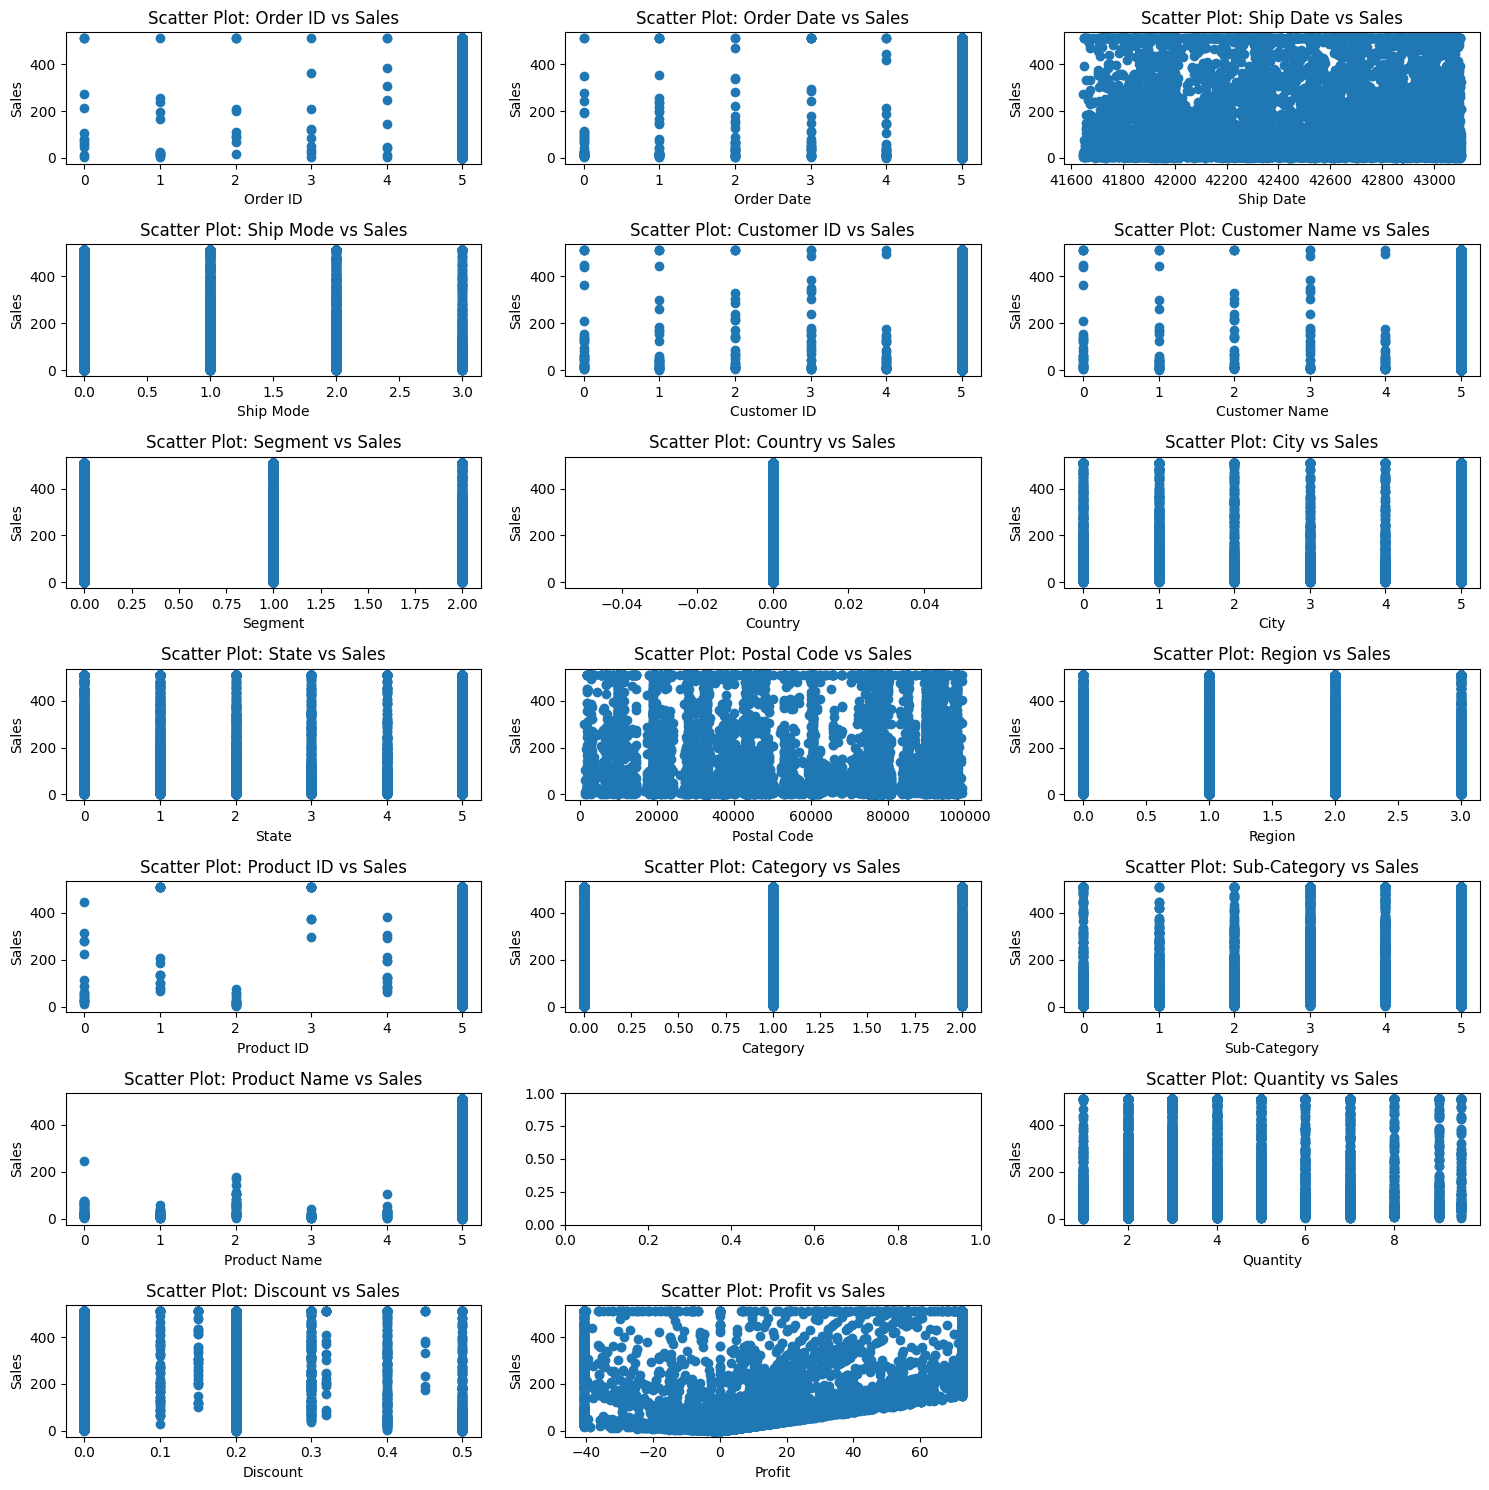

In [ ]:

# Get the number of numerical columns (excluding 'Sales')
num_cols = len(df.select_dtypes(include=np.number).columns) - 1

# Calculate the number of rows and columns for subplots, ensuring enough space
num_rows = int(np.ceil(num_cols / 3)) # Calculate rows dynamically to fit all columns
num_cols = 3  # You can adjust this as needed

# Create a figure and axes for the subplots with adjusted size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
axes = axes.flatten()

# Iterate through numerical columns (excluding 'Sales') and create scatter plots
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
  if column != 'Sales':
    # Check if 'i' is within the bounds of 'axes'
    if i < len(axes):
      axes[i].scatter(df[column], df['Sales'])
      axes[i].set_xlabel(column)
      axes[i].set_ylabel('Sales')
      axes[i].set_title(f'Scatter Plot: {column} vs Sales')
    else:
      print(f"Skipping plot for {column} as it exceeds the subplot grid.")
      break  # Exit loop if we've run out of subplots

# Remove any empty subplots if necessary
for i in range(num_cols * num_rows):
  if i >= len(df.select_dtypes(include=np.number).columns) - 1:
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

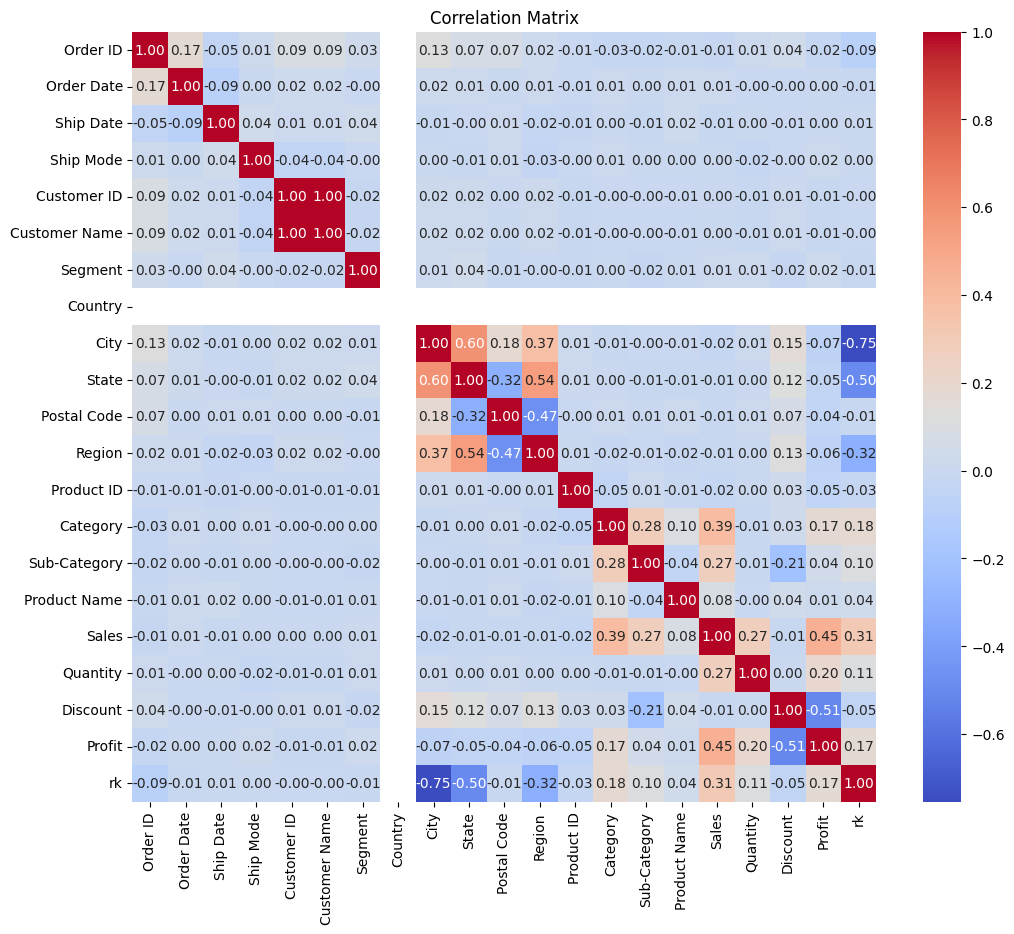

Sales            1.000000
Profit           0.452076
Category         0.391230
rk               0.311066
Sub-Category     0.271924
Quantity         0.268361
Product Name     0.083006
Order Date       0.010685
Segment          0.008726
Customer ID      0.004107
Customer Name    0.004107
Ship Mode        0.003318
Discount        -0.008373
State           -0.010294
Region          -0.011983
Postal Code     -0.012297
Ship Date       -0.012701
Order ID        -0.014107
City            -0.021712
Product ID      -0.023482
Country               NaN
Name: Sales, dtype: float64


In [ ]:

# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation with Sales
print(df.corr()['Sales'].sort_values(ascending=False))


# **Splitting**

In [ ]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [ ]:
Evaluation_Score = {} #to store evl score of all the model

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train


array([[  0.06897629,   0.12203304,  -1.28215729, ...,   0.39748097,
         -0.52245111,  -0.7286893 ],
       [-19.51651816,   0.12203304,   1.21408612, ...,  -0.88056972,
          1.84060342,   2.25504196],
       [  0.06897629,   0.12203304,   0.29217804, ...,   0.39748097,
         -0.49677062,  -0.66927872],
       ...,
       [  0.06897629,   0.12203304,  -1.11432275, ...,   1.67553167,
         -1.89607665,   2.25504196],
       [  0.06897629,   0.12203304,  -0.52808376, ...,   2.31455701,
         -0.64664506,  -0.56365991],
       [  0.06897629,   0.12203304,   1.38192067, ...,   0.39748097,
         -0.43226878,  -0.74189165]])

# **1.Linear Regression**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred_lr = linReg.predict(x_test)
Evaluation_Score['Linear Regression'] = r2_score(y_test, y_pred_lr)
r2_score(y_test, y_pred_lr)


0.4612083975400685

# **2.Ridge Regression**

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
Evaluation_Score['Ridge Regression'] = r2_score(y_test, y_pred_ridge)
r2_score(y_test, y_pred_ridge)


0.46122235636787545

# **3.Lasso Regression**

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
Evaluation_Score['Lasso Regression'] = r2_score(y_test, y_pred_lasso)
r2_score(y_test, y_pred_ridge)


0.46122235636787545

# **4.Decision Tree Regression**

In [ ]:
dt = DecisionTreeRegressor(random_state=45)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
Evaluation_Score['Decision Tree Regression'] = r2_score(y_test, y_pred_dt)
r2_score(y_test, y_pred_ridge)

0.46122235636787545

# **5.Random Forest Regression**

In [ ]:
rf = RandomForestRegressor(random_state=45)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
Evaluation_Score['Random Forest Regression'] = r2_score(y_test, y_pred_rf)
r2_score(y_test, y_pred_ridge)


0.46122235636787545

# **6.Gradient Boosting Regression**

In [ ]:
gb = GradientBoostingRegressor(random_state=45)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
Evaluation_Score['Gradient Boosting Regression'] = r2_score(y_test, y_pred_gb)
r2_score(y_test, y_pred_ridge)


0.46122235636787545

# **7.Support Vector Regression**

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
Evaluation_Score['Support Vector Regression'] = r2_score(y_test, y_pred_svr)
r2_score(y_test, y_pred_ridge)


0.46122235636787545

# R2_Scores

In [ ]:

for model, r2 in Evaluation_Score.items():
    print(f"{model}: R2 = {r2:.4f}")

Linear Regression: R2 = 0.4612
Ridge Regression: R2 = 0.4612
Lasso Regression: R2 = 0.4638
Decision Tree Regression: R2 = 0.7196
Random Forest Regression: R2 = 0.8455
Gradient Boosting Regression: R2 = 0.8295
Support Vector Regression: R2 = 0.2763
